C:\Users\tomar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 28, 28) (50000,)


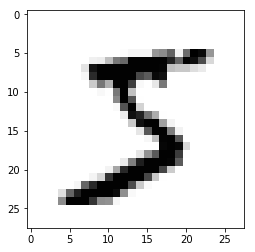

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


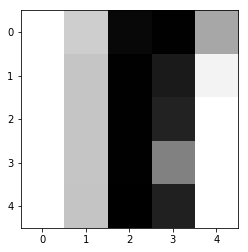

And the whole sample:


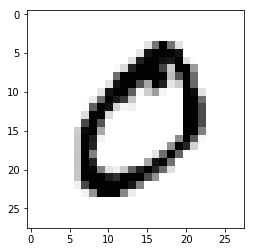

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [2]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [3]:
X_train = X_train.reshape([50000, 784])
X_test = X_test.reshape([10000, 784])

In [4]:
import tensorflow as tf

In [5]:
input_X = tf.placeholder(tf.float32,shape=(None,784))
input_y = tf.placeholder(tf.float32,shape=(None,10))
prob = tf.placeholder(tf.float32)
W1 = tf.get_variable("W1",  [784, 150], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [150], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [150, 10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [10], initializer=tf.zeros_initializer())

In [6]:
Z1 = tf.matmul(input_X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1,prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.sigmoid(Z2)

In [7]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=A2))
optimizer = tf.train.AdamOptimizer(0.0004).minimize(cost)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
import numpy as np
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [14]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(150):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={input_X:X_train[i:i+batch_size], input_y:y_train[i: i+batch_size], prob : 0.80})
        if epoch%10==0:
            a=sess.run(cost, feed_dict={input_X:X_test, input_y:y_test, prob : 0.80})
            print ("In epoch {0}, loss is {1}".format(epoch,a))
        
    
    # Calculate the correct predictions
    pred = tf.argmax(Z2, 1)
    correct=  tf.equal(pred, tf.argmax(input_y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    train_accuracy = accuracy.eval({input_X: X_train, input_y: y_train,prob : 1})
    test_accuracy = accuracy.eval({input_X: X_test, input_y: y_test, prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

In epoch 0, loss is 1.6994646787643433
In epoch 10, loss is 1.5364723205566406
In epoch 20, loss is 1.5171711444854736
In epoch 30, loss is 1.5071094036102295
In epoch 40, loss is 1.5014095306396484
In epoch 50, loss is 1.498604655265808
In epoch 60, loss is 1.4954928159713745
In epoch 70, loss is 1.494065761566162
In epoch 80, loss is 1.4936832189559937
In epoch 90, loss is 1.491947889328003
In epoch 100, loss is 1.4911150932312012
In epoch 110, loss is 1.4905545711517334
In epoch 120, loss is 1.4901649951934814
In epoch 130, loss is 1.4898244142532349
In epoch 140, loss is 1.4893091917037964
Train Accuracy: 0.99128
Test Accuracy: 0.9771
